In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv')
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


in this dataset we have 213 rows and 11 columns in which all are in continuous type data in this the columns name are not give so we have change columns name for better observation

In [3]:
data.rename(columns={'1':'Id number','1.52101':'Refractive index','13.64':'sodium','4.49':'magnesium','1.10':'aluminium',
                     '71.78':'silicon','0.06':'potassium','8.75':'calcium','0.00':'barium','0.00.1':'iron','1.1':'type_of_glass'},inplace=True)
print(data.head())

   Id number  Refractive index  sodium  magnesium  aluminium  silicon  \
0          2           1.51761   13.89       3.60       1.36    72.73   
1          3           1.51618   13.53       3.55       1.54    72.99   
2          4           1.51766   13.21       3.69       1.29    72.61   
3          5           1.51742   13.27       3.62       1.24    73.08   
4          6           1.51596   12.79       3.61       1.62    72.97   

   potassium  calcium  barium  iron  type_of_glass  
0       0.48     7.83     0.0  0.00              1  
1       0.39     7.78     0.0  0.00              1  
2       0.57     8.22     0.0  0.00              1  
3       0.55     8.07     0.0  0.00              1  
4       0.64     8.07     0.0  0.26              1  


inthis data the id number is nominal data hece its unique id then remove it from dataframe

In [4]:
data.drop('Id number',axis=1,inplace=True)

In [5]:
data.shape

(213, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive index  213 non-null    float64
 1   sodium            213 non-null    float64
 2   magnesium         213 non-null    float64
 3   aluminium         213 non-null    float64
 4   silicon           213 non-null    float64
 5   potassium         213 non-null    float64
 6   calcium           213 non-null    float64
 7   barium            213 non-null    float64
 8   iron              213 non-null    float64
 9   type_of_glass     213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


we see there is nonull present and 9 float type and wo intizer type columns

In [20]:
for i in data.columns:
    print(data[i].value_counts())

2      1
136    1
138    1
139    1
140    1
      ..
76     1
77     1
78     1
79     1
214    1
Name: Id number, Length: 213, dtype: int64
1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: Refractive index, Length: 177, dtype: int64
13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: sodium, Length: 142, dtype: int64
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: magnesium, Length: 93, dtype: int64
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: aluminium, Length: 117, dtype: int64
72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: silicon, Length: 132, dtype: int64
0.00    30
0.57    12
0.56

In [28]:
data.isnull().sum()

Refractive index    0
sodium              0
magnesium           0
aluminium           0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [5]:
data['type_of_glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [6]:
threshold=3
data['type_of_glass']= (data['type_of_glass']>threshold).astype(int)

In [7]:
data['type_of_glass'].unique()

array([0, 1])

In [10]:
# letscheck statistics of dataset
data.describe()

,Refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,0.239437
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,0.427745
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,0.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,0.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


#description given below of this dataset

1) there is no null values present in any of the columns hence its look like perfect
2) the mean value of columns  are well manner with proportion to median
in some columns more differnce between max and 75% of dataset hence possibility to outlier present in these columns
3) we have also notice std deviation and meean and 25% percentile values which is well manner

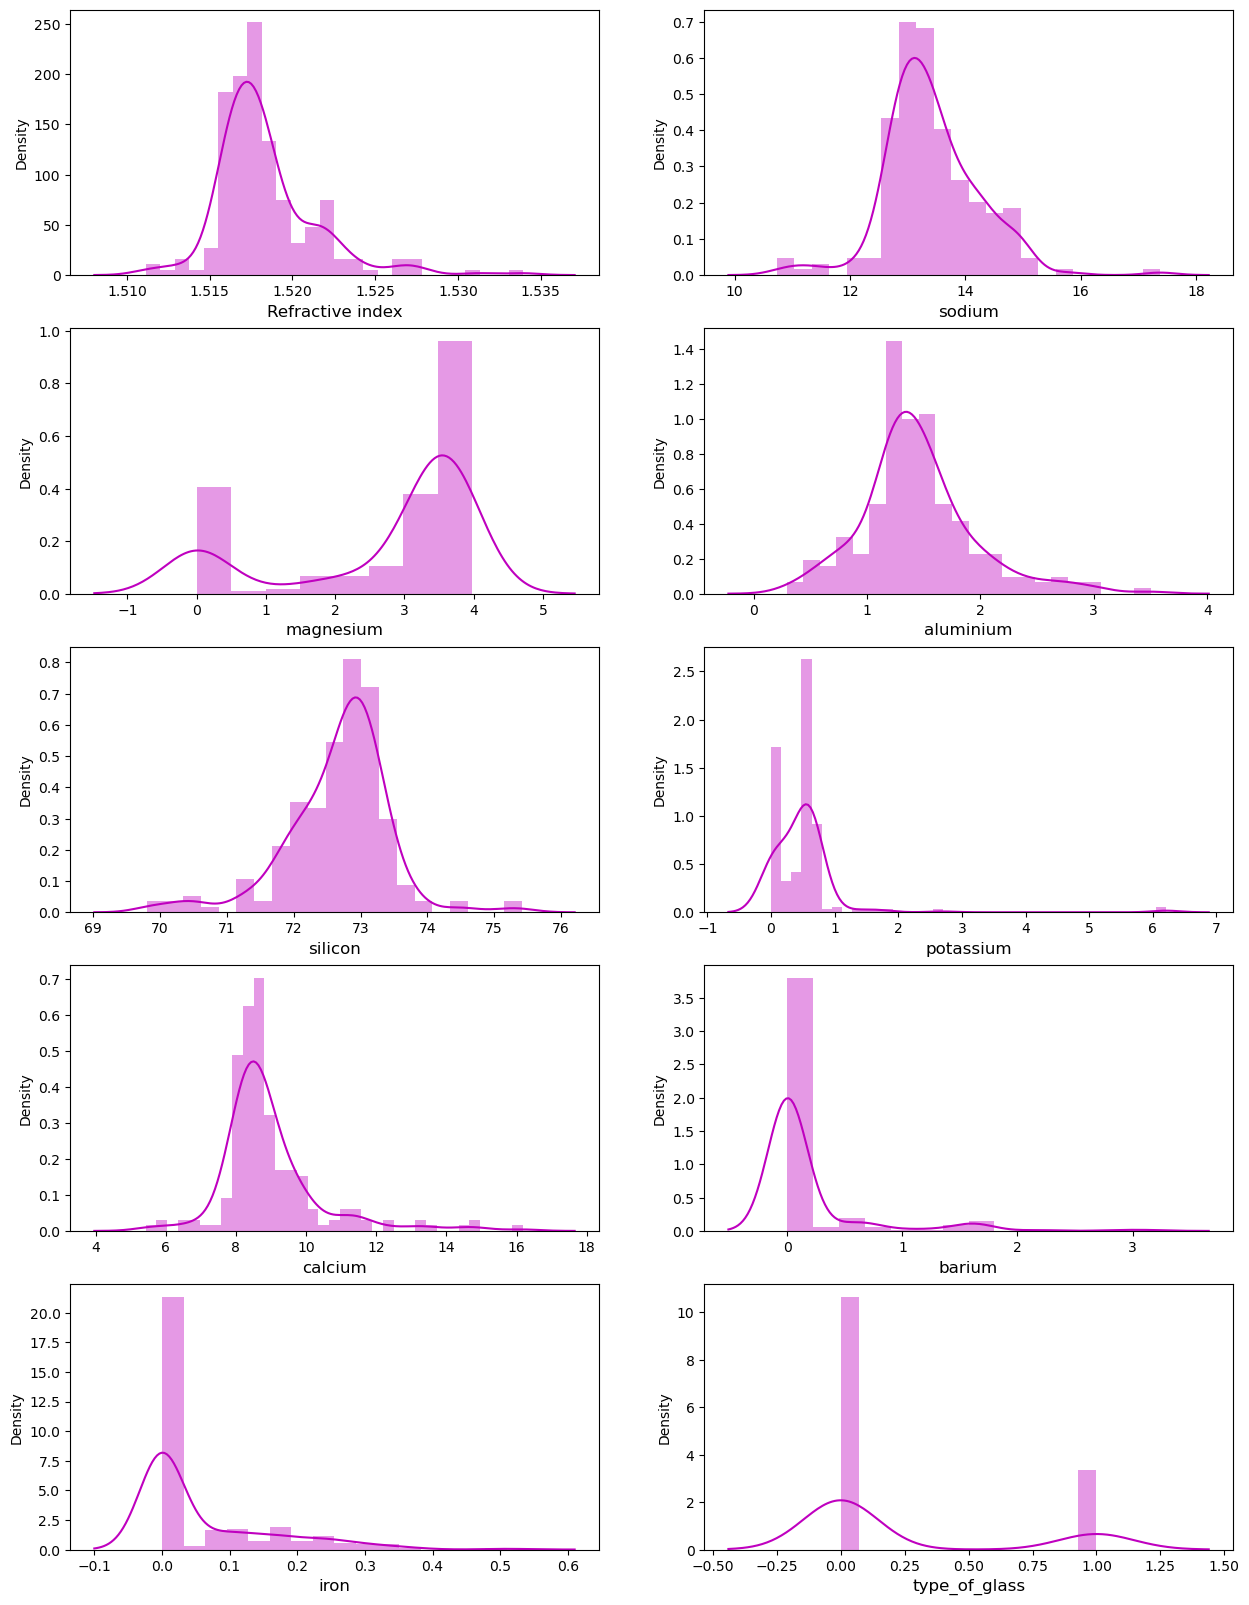

In [11]:
#visualization of numeric columns
plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(data[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

we can see that there is normally distributed of data in all columnse because a well shape curved is maintain in each column but
possibility to outlier present hence this through boxplot graph

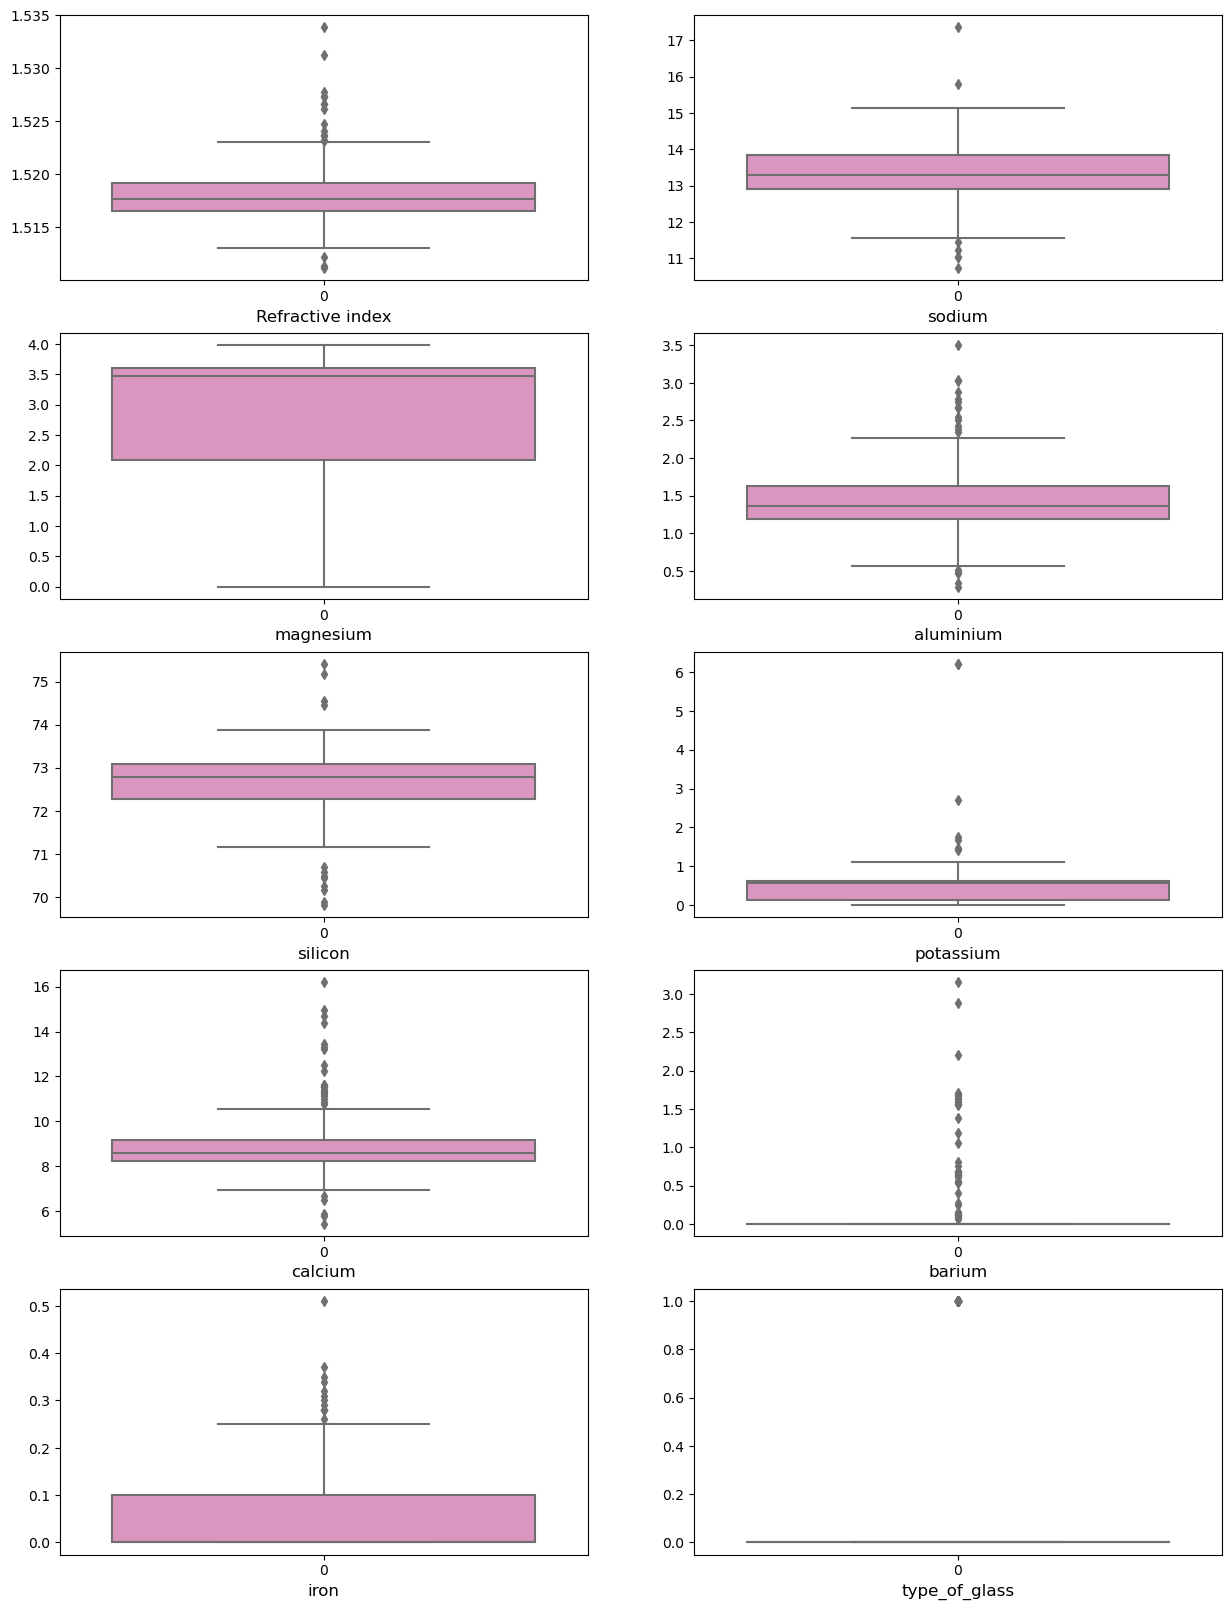

In [8]:
# checking for outliers from ploting boxplot
plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data[col],palette='Set2_r')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

<Figure size 1500x2000 with 0 Axes>

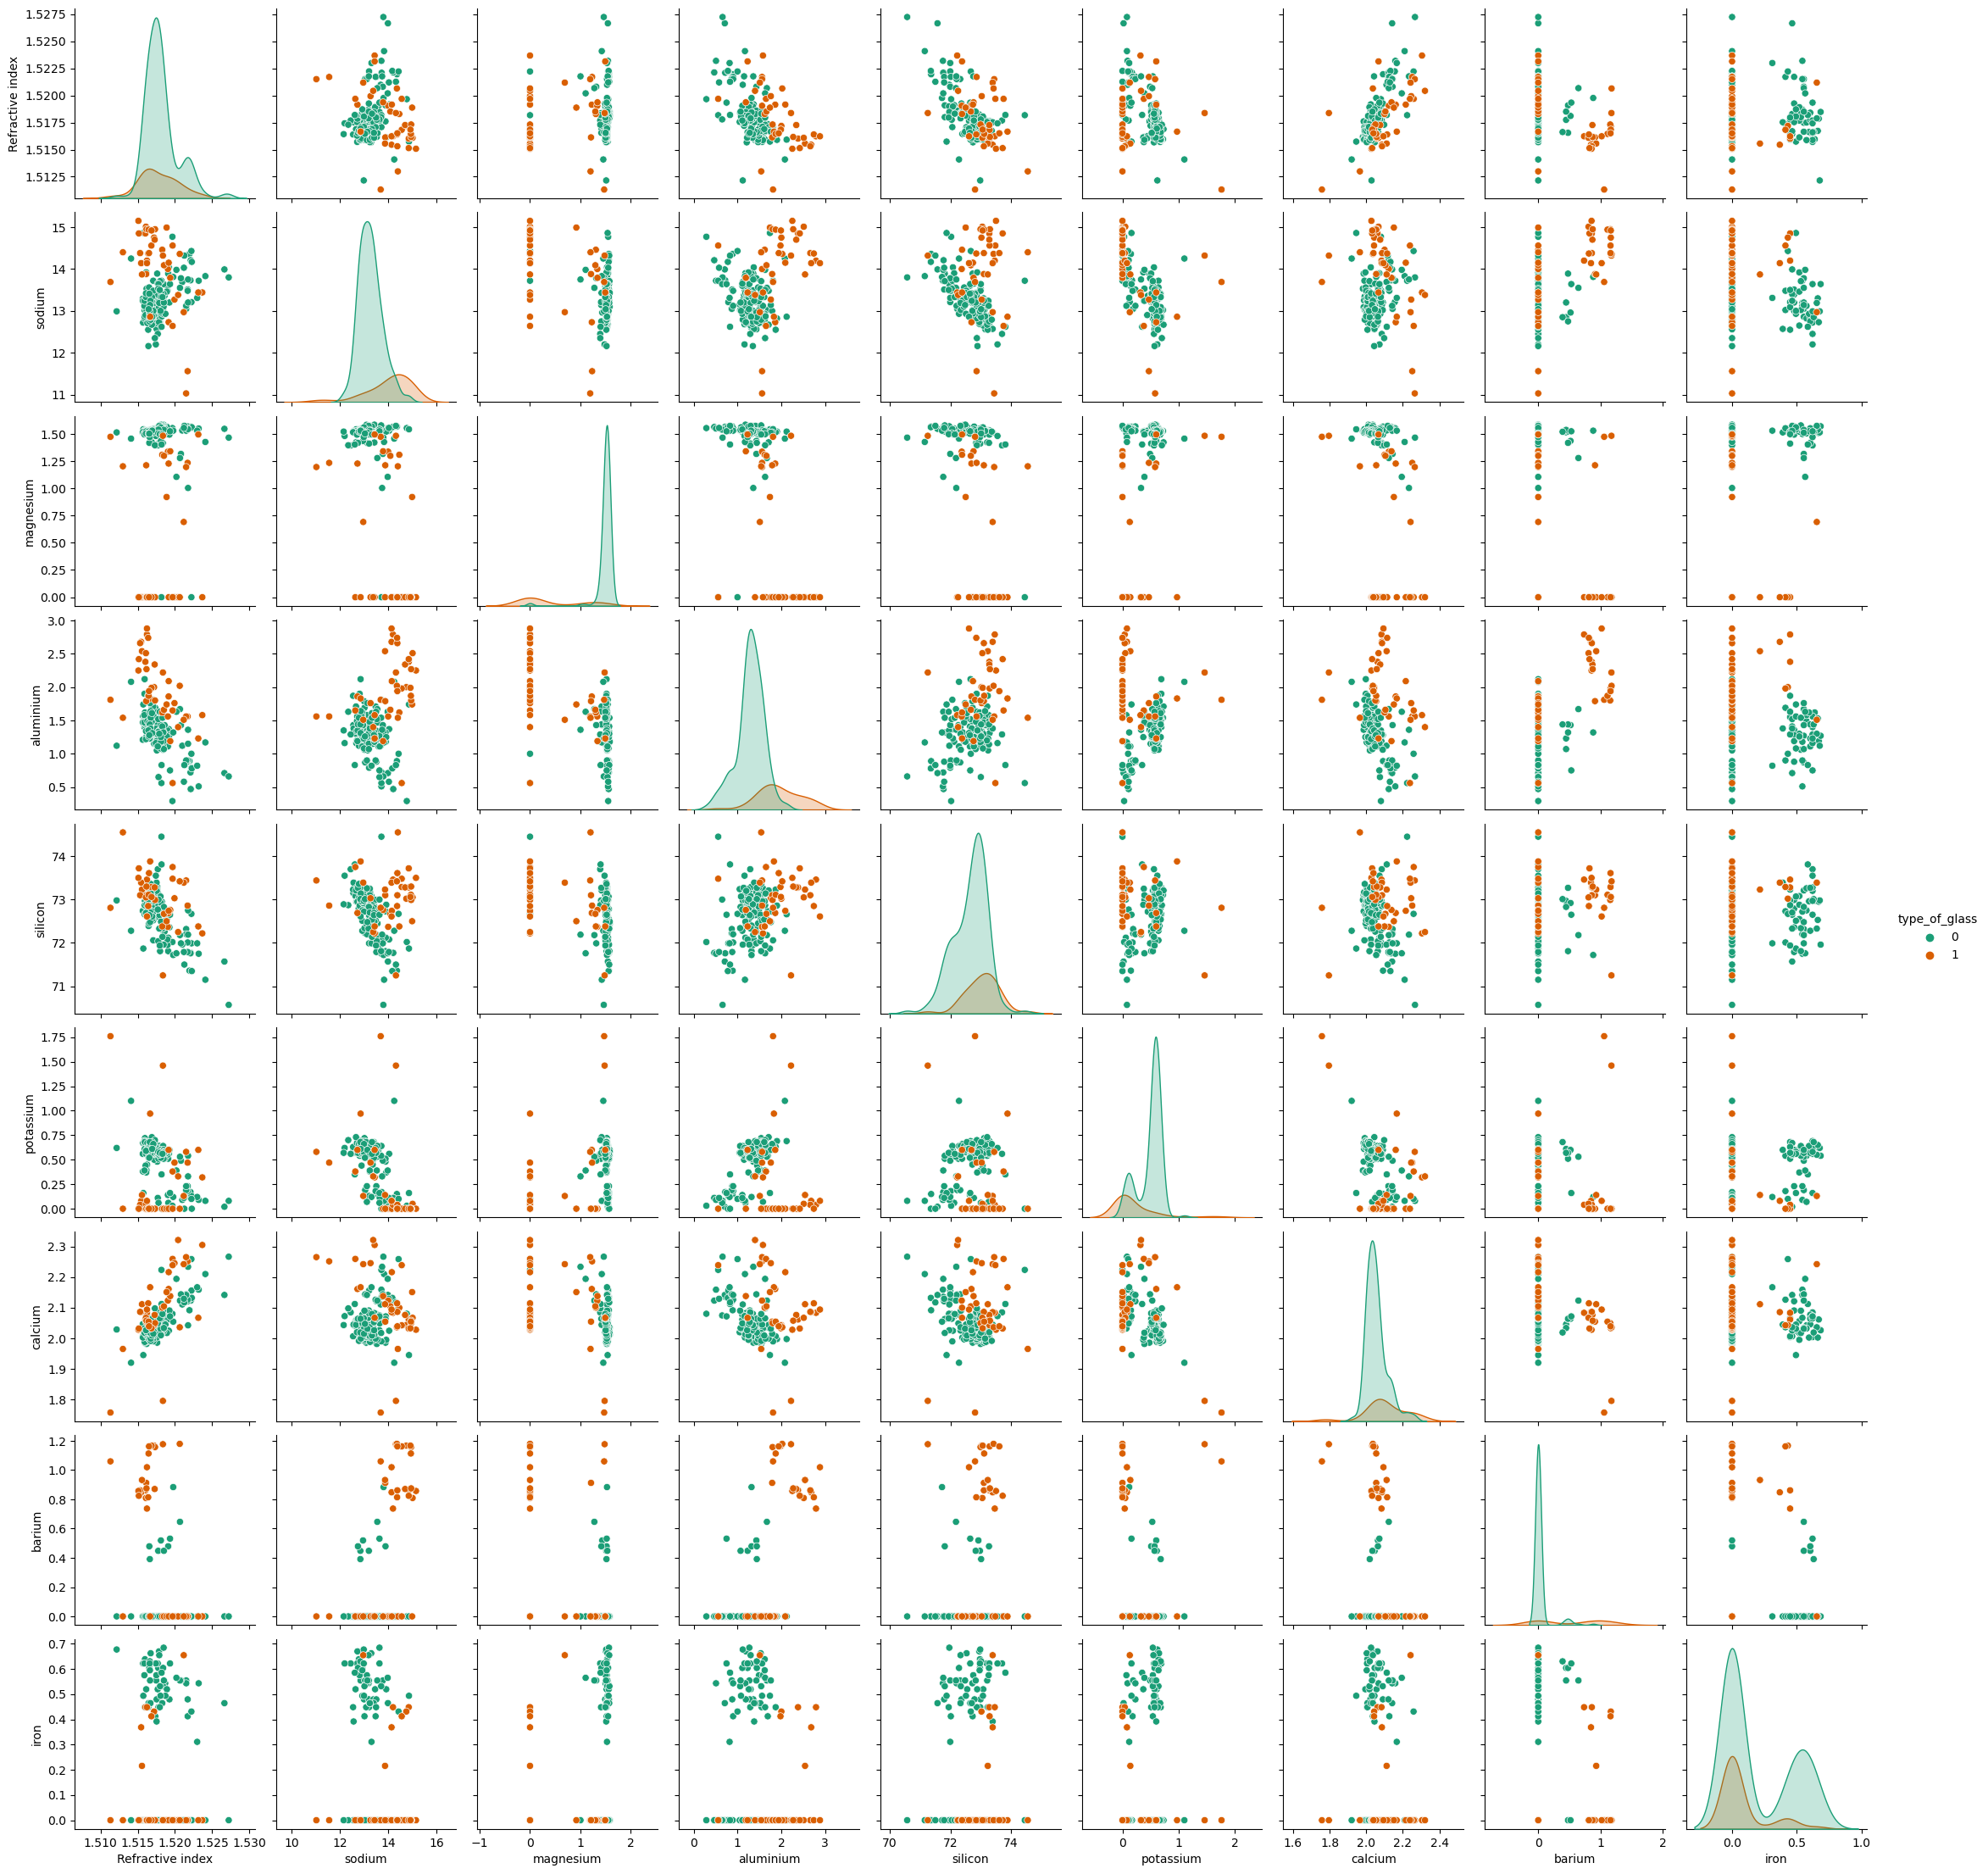

In [44]:
#multivariate analysis
plt.figure(figsize=(15,20))
sns.pairplot(data1, hue='type_of_glass', palette= 'Dark2')
plt.show()

we see that more ofcolumns are oulier present hence remoove this through zscore method  so that our data is well fitted to model

In [9]:
from scipy.stats import zscore

In [10]:
out_features = data[['Refractive index','sodium','aluminium','silicon','potassium','calcium','barium','iron']]
z = np.abs(zscore(out_features))
z

,Refractive index,sodium,aluminium,silicon,potassium,calcium,barium,iron
0,0.245101,0.591880,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301
1,0.716826,0.150946,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301
2,0.228607,0.240996,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301
3,0.307777,0.167507,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301
4,0.789399,0.755419,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200
...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301
209,0.495808,1.853443,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301
210,0.757727,1.167545,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301
211,0.607966,1.192041,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301


In [11]:
#threshold=3
np.where(z>3)

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
        130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
        187, 188, 200, 200, 202, 206, 212], dtype=int64),
 array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2,
        4, 7, 1, 3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))

In [13]:
z.iloc[105,1]

3.278544280730533

In [15]:
 #now removing data above zscore and creating new dataframe
data1 = data[(z<3).all(axis=1)]

data1.shape

(193, 10)

In [17]:
Q1 = out_features.quantile(0.25)
Q3 = out_features.quantile(0.75)
IQR = Q3-Q1
data2 = data[~((data<(Q1-1.5*IQR)) |(data>(Q3+1.5*IQR))).any(axis=1)]

data2.shape

(135, 10)

we can see that there is too much loss in data in for removing utlier in quantile method hence we use zscore method and go with
the data1 dataset

In [20]:
#CHECKING SKEWNESS
data1.skew()

Refractive index    0.971729
sodium              0.375857
magnesium          -1.533664
aluminium           0.649917
silicon            -0.436288
potassium           0.297900
calcium             1.074092
barium              3.178256
iron                1.478611
type_of_glass       1.455790
dtype: float64

In [21]:
#apply cube root method to remove skewness in volume
data1['magnesium']= np.cbrt(data1['magnesium'])
data1['calcium']= np.cbrt(data1['calcium'])
data1['barium']= np.cbrt(data1['barium'])
data1['iron']= np.cbrt(data1['iron'])

In [22]:
data1.skew()

Refractive index    0.971729
sodium              0.375857
magnesium          -1.892297
aluminium           0.649917
silicon            -0.436288
potassium           0.297900
calcium             0.609725
barium              2.198820
iron                0.875093
type_of_glass       1.455790
dtype: float64

In [23]:
#correlation between target and indipendent variables
data1.corr()

,Refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
Refractive index,1.000000,0.048762,0.059043,-0.520285,-0.604910,-0.362609,0.693877,-0.224310,0.020867,-0.057285
sodium,0.048762,1.000000,-0.528150,0.254805,-0.233588,-0.612858,0.018073,0.548616,-0.159948,0.465046
magnesium,0.059043,-0.528150,1.000000,-0.579002,-0.359225,0.502401,-0.389498,-0.650990,0.113416,-0.799864
aluminium,-0.520285,0.254805,-0.579002,1.000000,0.331868,0.000847,-0.222600,0.598833,-0.086766,0.600057
silicon,-0.604910,-0.233588,-0.359225,0.331868,1.000000,0.062254,-0.161570,0.181136,-0.003246,0.280572
potassium,-0.362609,-0.612858,0.502401,0.000847,0.062254,1.000000,-0.529334,-0.298576,0.047945,-0.402067
calcium,0.693877,0.018073,-0.389498,-0.222600,-0.161570,-0.529334,1.000000,-0.148647,0.013004,0.266391
barium,-0.224310,0.548616,-0.650990,0.598833,0.181136,-0.298576,-0.148647,1.000000,-0.036261,0.626785
iron,0.020867,-0.159948,0.113416,-0.086766,-0.003246,0.047945,0.013004,-0.036261,1.000000,-0.197212
type_of_glass,-0.057285,0.465046,-0.799864,0.600057,0.280572,-0.402067,0.266391,0.626785,-0.197212,1.000000


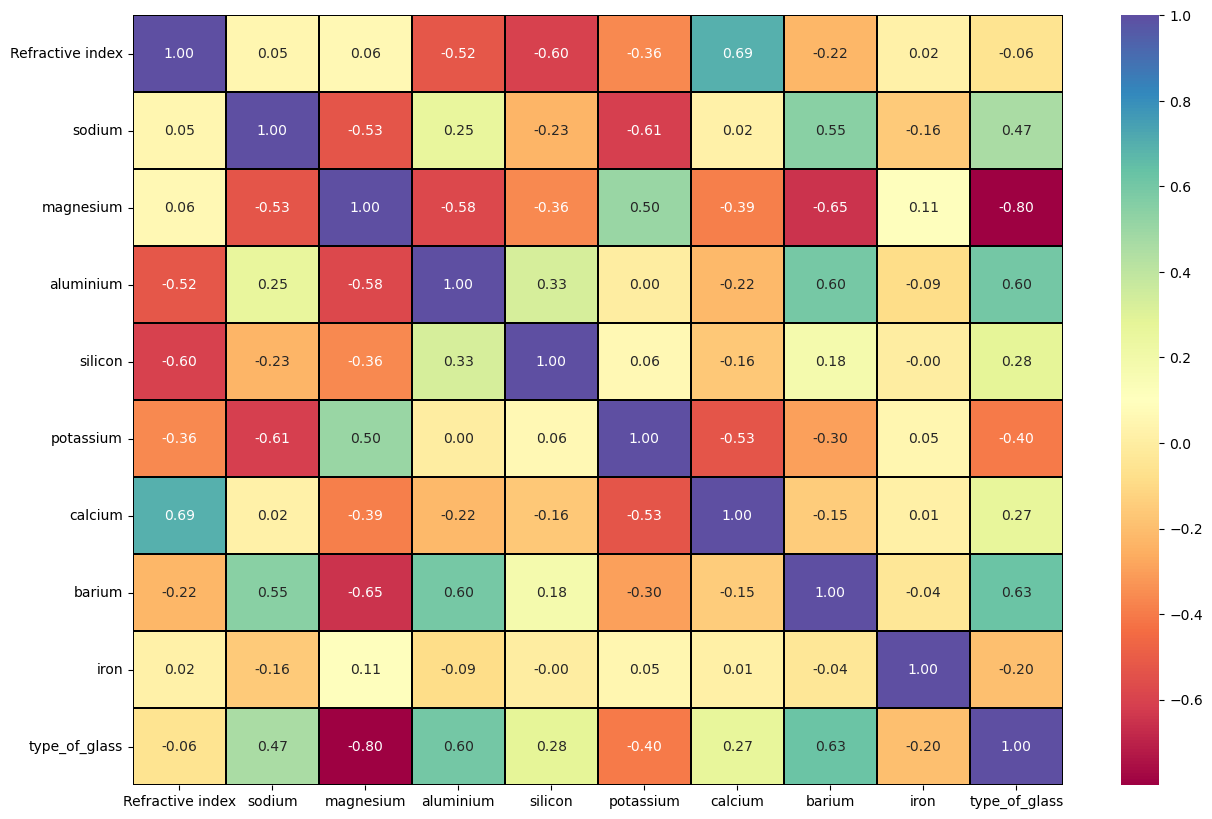

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'Spectral')
plt.show()

there is negative and positive both correlation are present in the data all columns are required to use in our dataset for
predicting target variable

In [26]:
#saperating variables into x and y
x=data1.drop('type_of_glass',axis=1)
y= data1['type_of_glass']

print(x.shape)
print(y.shape)

(193, 9)
(193,)


In [27]:
#scaling the featuresusing ss
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron
0,-0.191475,0.704498,0.484188,-0.145324,0.007760,0.165576,-1.035703,-0.416569,-0.680595
1,-0.819092,0.169658,0.470877,0.260836,0.455342,-0.154697,-1.091935,-0.416569,-0.680595
2,-0.169531,-0.305754,0.507839,-0.303276,-0.198816,0.485849,-0.605107,-0.416569,-0.680595
3,-0.274865,-0.216615,0.489477,-0.416098,0.610275,0.414677,-0.769075,-0.416569,-0.680595
4,-0.915648,-0.929734,0.486835,0.441351,0.420913,0.734950,-0.769075,-0.416569,1.848061
...,...,...,...,...,...,...,...,...,...
188,-0.722535,1.417617,-2.377492,2.968571,0.214336,-1.542547,0.669606,2.063771,-0.680595
189,-0.797147,1.075914,-2.377492,3.284473,-0.198816,-1.257860,0.399720,2.689053,-0.680595
190,-0.525034,2.234732,-2.377492,1.276236,0.575845,-1.542547,-0.410958,3.138481,-0.680595
191,1.142758,1.402760,-2.377492,1.343930,1.195574,-1.542547,-0.368191,3.175362,-0.680595


In [28]:
# now we would initaializing the model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier

In [29]:
maxacc= 0
maxrs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred= rfc.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('best accuracy is', maxacc, 'at random state', maxrs)

best accuracy is 1.0 at random state 1


In [30]:
#creating train test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= maxrs)

In [31]:
Lr =  LogisticRegression()
Lr.fit(x_train,y_train)
predLr = Lr.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predLr))
print('confusion matrix :\n',confusion_matrix(y_test,predLr))
print('classification report :\n',classification_report(y_test,predLr))


accracy_score :
 0.9310344827586207
confusion matrix :
 [[44  0]
 [ 4 10]]
classification report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.71      0.83        14

    accuracy                           0.93        58
   macro avg       0.96      0.86      0.89        58
weighted avg       0.94      0.93      0.93        58



In [33]:
ada = AdaBoostClassifier() 
ada.fit(x_train,y_train)
predada = ada.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predada))
print('confusion matrix :\n',confusion_matrix(y_test,predada))
print('classification report :\n',classification_report(y_test,predada))

accracy_score :
 0.9655172413793104
confusion matrix :
 [[44  0]
 [ 2 12]]
classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.86      0.92        14

    accuracy                           0.97        58
   macro avg       0.98      0.93      0.95        58
weighted avg       0.97      0.97      0.96        58



In [34]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predknn))
print('confusion matrix :\n',confusion_matrix(y_test,predknn))
print('classification report :\n',classification_report(y_test,predknn))

accracy_score :
 0.9310344827586207
confusion matrix :
 [[44  0]
 [ 4 10]]
classification report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.71      0.83        14

    accuracy                           0.93        58
   macro avg       0.96      0.86      0.89        58
weighted avg       0.94      0.93      0.93        58



In [36]:
dtc =  DecisionTreeClassifier() 
dtc.fit(x_train,y_train)
pred2 = dtc.predict(x_test)
print('accracy_score :',accuracy_score(y_test,pred2))
print('confusion matrix :',confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

accracy_score : 1.0
confusion matrix : [[44  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        14

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [35]:
#lets checking crooss validation across models

score= cross_val_score(knn,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.79487179 0.82051282 0.92307692 0.94736842 0.97368421]
mean : 0.891902834008097


In [37]:
cv=5
score= cross_val_score(Lr,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.87179487 0.82051282 0.8974359  0.89473684 0.97368421]
mean : 0.8916329284750338


In [38]:
cv=5
score= cross_val_score(rfc,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.79487179 0.84615385 0.8974359  0.89473684 0.97368421]
mean : 0.8813765182186234


In [40]:
score= cross_val_score(ada,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.82051282 0.92307692 0.8974359  0.92105263 0.97368421]
mean : 0.9071524966261808


In [42]:
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.79487179 0.79487179 0.8974359  0.94736842 1.        ]
mean : 0.8869095816464239


we see that adaboosclassifier the highest cross validatin score we proceed with this model

In [45]:
#nowwe can cheking hyper perameter tuning on the model(adaboostclassifier)
from sklearn.model_selection import GridSearchCV

In [46]:
params = {'n_estimators':[10,50,100],'learning_rate':[0.1,1,0.05]}

In [47]:
gridcv = GridSearchCV(AdaBoostClassifier(),params,cv=3)
gridcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 1, 0.05],
                         'n_estimators': [10, 50, 100]})

In [48]:
gridcv.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [50]:
final_model = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)
final_model.fit(x_train,y_train)
prede_ = final_model.predict(x_test)
acc = accuracy_score(y_test,prede_)
print('final accuracy of our model :\n',acc)

final accuracy of our model :
 0.9655172413793104


we see that after applying hypertuning the accuracy of our model increase hence we proceed with this model